In [2]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime, timedelta
import sys
sys.path.append('/Users/tarabaris/GitHub/odp-sdk-python/Examples')

## For SDK
from getpass import getpass
from odp_sdk import ODPClient
from getpass import getpass


## For plotting
from UtilityFunctions import *

## Extra functions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_palette(sns.color_palette("bright", 47))
import warnings
warnings.filterwarnings("ignore")
import calendar

# Connect to API

In [3]:
client = ODPClient(api_key=getpass(prompt='Insert your personal ODP API key:'), 
                       project="odp", client_name="odp")

Insert your personal ODP API key:········


INFO:odp-sdk.log:Connected
INFO:odp-sdk.log:Logged in to 'odp' as user 'Tara.Baris@oceandata.earth'


# Pull data for desired lat/long and timespan
Don't forget to specify if you want flagged data included or excluded

In [4]:
df=client.casts(longitude=[-10,35],
                latitude=[50,80],
                timespan=['2015-01-01','2018-12-31'],
                n_threads=35) 

INFO:odp-sdk.log:Locating available casts..
INFO:odp-sdk.log:-> 81449 casts found
INFO:odp-sdk.log:Downloading data from casts..
INFO:odp-sdk.log:-> 10515806 data rows downloaded in 1066.19s


In [34]:
df.to_pickle('df2015_18_norway.pkl')

# Let's explore the data

In [5]:
df2=df[(df['Temperature_WODflag']==0) & (df.z<50)][['externalId','lon','lat','z','datetime','Temperature']].dropna()

In [6]:
df2.head()

,externalId,lon,lat,z,datetime,Temperature
0,cast_wod_3_2015_31101_18656490,-7.1045,50.5755,3.965464,2015-03-14,9.135
1,cast_wod_3_2015_31101_18656490,-7.1045,50.5755,4.956818,2015-03-14,9.135
2,cast_wod_3_2015_31101_18656490,-7.1045,50.5755,5.948166,2015-03-14,9.135
3,cast_wod_3_2015_31101_18656490,-7.1045,50.5755,6.939511,2015-03-14,9.135
4,cast_wod_3_2015_31101_18656490,-7.1045,50.5755,7.930850,2015-03-14,9.136


In [7]:
df_surf=interpolate_casts_to_z(df2,'Temperature',[0,10,20]) ##This can take a while

In [8]:
df_surf.to_pickle('df_surf2015_18_norway.pkl')

In [13]:
df_surf.head()

,externalId,datetime,lon,lat,z,Temperature,unixtime
1,cast_wod_3_2015_31101_18656490,2015-03-14,-7.104500,50.575500,10.0,9.136000,1426291200000000000
2,cast_wod_3_2015_31101_18656490,2015-03-14,-7.104500,50.575500,20.0,9.136175,1426291200000000000
4,cast_wod_3_2015_31101_18656805,2015-05-14,-7.102667,50.576332,10.0,11.231000,1431561600000000000
5,cast_wod_3_2015_31101_18656805,2015-05-14,-7.102667,50.576332,20.0,11.040900,1431561600000000000
7,cast_wod_3_2015_31101_18656495,2015-03-17,-7.012833,50.592667,10.0,9.357826,1426550400000000000


In [15]:
df_surf.dropna(inplace=True)
df_surf['unixtime']=df_surf['datetime'].apply(lambda x : x.value) 
df_surf=df_surf[df_surf.Temperature>-1]
df_surf.describe()

,lon,lat,z,Temperature,unixtime
count,183292.000000,183292.000000,183292.000000,183292.000000,1.832920e+05
mean,7.239324,60.238750,10.189043,9.585531,1.489223e+18
std,9.990932,7.462645,7.962515,4.782174,3.567350e+16
min,-9.999333,50.000830,0.000000,-1.000000,1.420157e+18
25%,-0.891000,55.311165,0.000000,5.881965,1.461110e+18
50%,8.350667,57.294900,10.000000,9.238047,1.495843e+18
75%,14.599000,62.099709,20.000000,13.305000,1.521936e+18
max,34.986000,79.999664,20.000000,25.802584,1.546128e+18


# Plot temperature over months

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

,month,North Sea,Barents Sea,Baltic Sea
0,January,7.364733,2.750277,4.334331
1,February,7.028915,5.583226,4.103400
2,March,5.351347,2.570641,2.637639
3,April,6.077198,2.176115,3.352534
4,May,8.790373,5.406427,6.474589
5,June,13.074521,5.930183,12.816195
6,July,15.443251,7.038476,16.443784
7,August,17.379251,9.053936,16.299361
8,September,16.548640,7.383399,15.694856
9,October,12.328609,7.659250,11.516855


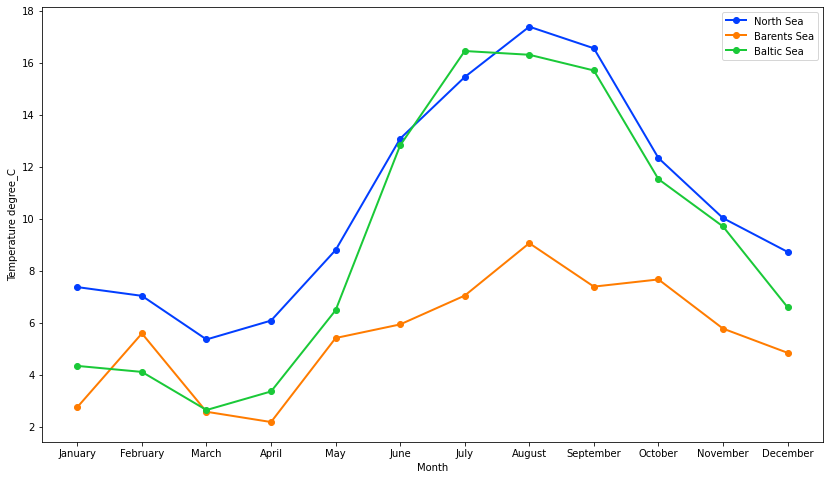

In [39]:
## Pick a year
df_2018 = df_surf[df_surf.datetime.dt.year == 2018]
coord = {
'month':[1,2,3,4,5,6,7,8,9,10,11,12],
'lat':[56,73,56],
'lon':[3, 20, 18],
'name':['North Sea','Barents Sea','Baltic Sea']}
kind = 'rbf'


temp = []
for mnth in coord['month']:
    try:
        points=df_2018[df_2018.datetime.dt.month == mnth][['lon','lat']].values.astype('float')
        values=df_2018[df_2018.datetime.dt.month == mnth]['Temperature'].values.astype('float')
        int_points=[coord['lon'], coord['lat']]
        grid,g=interpolate_to_grid(points.copy(),values.copy(),int_points.copy(), interp_type=kind,
                               rbf_func='linear',rbf_smooth=0.1,rescale=True)
        
    except:
        g=None
    temp.append(g)
    
df_temp = pd.DataFrame({
                    'month': [calendar.month_name[mnth] for mnth in coord['month']]})

temp_values = []
for i in range(len(coord['month'])):
    temp_values.append(temp[i].diagonal())

for name in coord['name']:
    temp_values = np.vstack(temp_values)
    df_temp[name] = temp_values[:,coord['name'].index(name)]
    
colors = sns.color_palette('bright')
plt.figure(figsize=(14,8))

for i, name in enumerate(coord['name']):
    plt.plot( 'month', name, data=df_temp, marker='o',color=colors[i], linewidth=2)
    plt.xlabel('Month')
    plt.ylabel('Temperature {}'.format(get_units()['Temperature']))
    plt.legend()
    
df_temp


# Plot seasonal temperature over years

In [27]:
seasons = ['Winter', 'Winter', 'Winter', 'Spring', 'Spring', 'Spring','Summer', 'Summer','Summer','Fall', 'Fall', 'Fall', ]
month_to_season = dict(zip(range(1,13), seasons))

df_surf['season'] = df_surf.datetime.dt.month.map(month_to_season)

df_surf.head()

,externalId,datetime,lon,lat,z,Temperature,unixtime,season
1,cast_wod_3_2015_31101_18656490,2015-03-14,-7.104500,50.575500,10.0,9.136000,1426291200000000000,Winter
2,cast_wod_3_2015_31101_18656490,2015-03-14,-7.104500,50.575500,20.0,9.136175,1426291200000000000,Winter
4,cast_wod_3_2015_31101_18656805,2015-05-14,-7.102667,50.576332,10.0,11.231000,1431561600000000000,Spring
5,cast_wod_3_2015_31101_18656805,2015-05-14,-7.102667,50.576332,20.0,11.040900,1431561600000000000,Spring
7,cast_wod_3_2015_31101_18656495,2015-03-17,-7.012833,50.592667,10.0,9.357826,1426550400000000000,Winter


,year,North Sea,Barents Sea,Baltic Sea
0,2015,15.542661,8.836471,15.313691
1,2016,15.201867,8.613310,16.987446
2,2017,16.109360,8.733190,15.307017
3,2018,16.593198,8.478157,15.515344


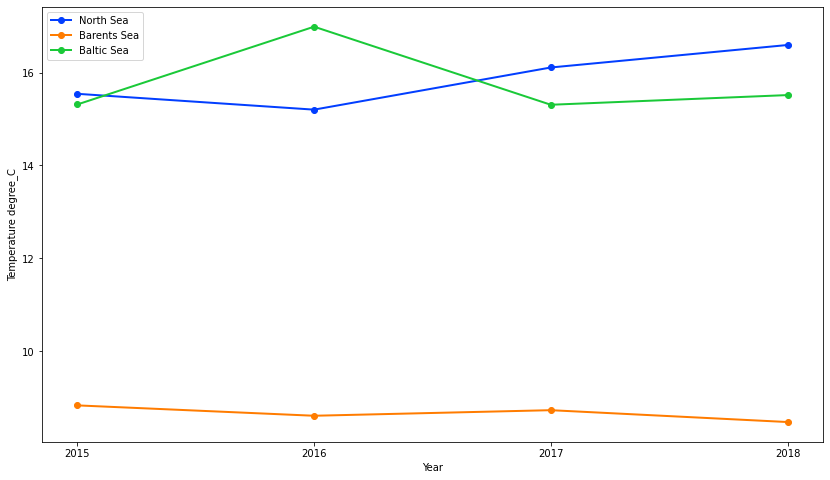

In [29]:
season = 'Summer'
df_season = df_surf[df_surf.season == season]

coord = {
'year':[2015, 2016, 2017, 2018],
'lat':[56,73,56],
'lon':[3, 20, 18],
'name':['North Sea','Barents Sea','Baltic Sea']}
kind = 'rbf'


temp = []
for yr in coord['year']:
    try:
        points=df_season[df_season.datetime.dt.year == yr][['lon','lat']].values.astype('float')
        values=df_season[df_season.datetime.dt.year == yr]['Temperature'].values.astype('float')
        int_points=[coord['lon'], coord['lat']]
        grid,g=interpolate_to_grid(points.copy(),values.copy(),int_points.copy(), interp_type=kind,
                               rbf_func='linear',rbf_smooth=0.1,rescale=True)
        
    except:
#         print(mnth)
        g=None
    temp.append(g)
    
df_temp = pd.DataFrame({
                    'year': coord['year']})

temp_values = []
for i in range(len(coord['year'])):
    temp_values.append(temp[i].diagonal())

for name in coord['name']:
    temp_values = np.vstack(temp_values)
    df_temp[name] = temp_values[:,coord['name'].index(name)]
    
colors = sns.color_palette('bright')
plt.figure(figsize=(14,8))

for i, name in enumerate(coord['name']):
    plt.plot( 'year', name, data=df_temp, marker='o',color=colors[i], linewidth=2)
    plt.xlabel('Year')
    plt.xticks(coord['year'])
    plt.ylabel('Temperature {}'.format(get_units()['Temperature']))
    plt.legend()
    
df_temp


# Plot individual casts with depth

Text(0.5, 0, 'Temperature degree_C')

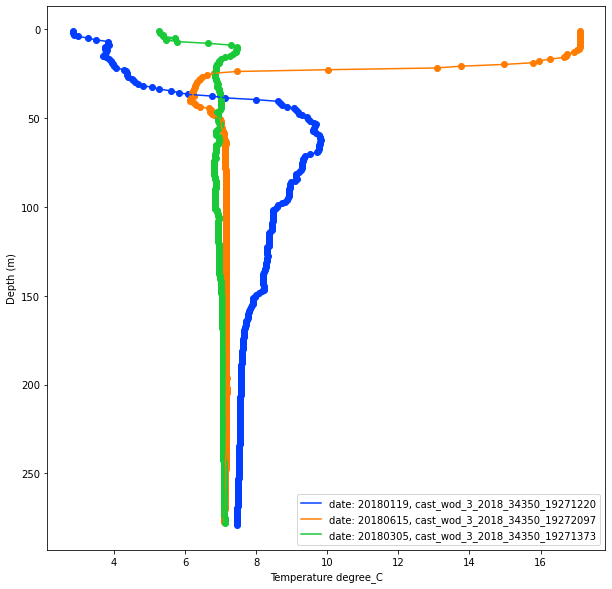

In [30]:
cast_names=['cast_wod_3_2018_34350_19271220','cast_wod_3_2018_34350_19272097','cast_wod_3_2018_34350_19271373']
variable='Temperature'

plt.figure(figsize=(10,10))
legend=[]
for cast_name in cast_names:
    data=client.download_data_from_casts([cast_name])
    plt.plot(data[variable],data.z)
    plt.scatter(data[variable],data.z)
    legend.append('date: {}, {}'.format(data.date.iloc[0],cast_name))

plt.legend(legend,loc=0)
plt.gca().invert_yaxis()   
plt.ylabel('Depth (m)')
plt.xlabel(variable + ' ' + get_units()[variable])
